In [41]:
from __future__ import print_function
%matplotlib inline
from pylab import *

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import skimage
from skimage import *
from skimage.color import *
from skimage import io
import numpy as np

In [42]:
def NeNe(img, scaleFac):
    imgShape = img.shape

    widht = imgShape[0]
    height = imgShape[1]

    widhtScaled  = int(widht * scaleFac)
    heightScaled  = int(height * scaleFac)

    scaleFac = (widhtScaled - 1) / (widht - 1)

    imgNew = np.random.randint( 5, size = (widhtScaled, heightScaled, 3) )

    for j in range(0, heightScaled):
        for i in range(0, widhtScaled):

            x = i/scaleFac
            y = j/scaleFac
            x1 = int(x)
            x2 = x1 + 1
            y1 = int(y)
            y2 = y1 + 1

            x2ind = x2
            y2ind = y2

            if x2 >= widht:
                x2ind = x2-1
            if y2 >= height:
                y2ind = y2-1

            if x - x1 < 0.5 :
                if y - y1 < 0.5:
                    newPix = img[x1, y1]
                else:
                    newPix = img[x1, y2ind]
            else:
                if y - y1 < 0.5:
                    newPix = img[x2ind, y1]
                else:
                    newPix = img[x2ind, y2ind]
                    
            imgNew[i, j, 0] = newPix[0]
            imgNew[i, j, 1] = newPix[1]
            imgNew[i, j, 2] = newPix[2]         

    return imgNew

In [43]:
def BinLin(img, scaleFac):
    
    
    imgShape = img.shape
    
    widht = imgShape[0]
    height = imgShape[1]

    widhtScaled  = int(widht * scaleFac)
    heightScaled  = int(height * scaleFac)

    scaleFac = (widhtScaled - 1) / (widht - 1)

    imgNew = np.random.randint( 5, size = (widhtScaled, heightScaled, 3) )

    for j in range(0, heightScaled):
        for i in range(0, widhtScaled):
                x = i/scaleFac
                y = j/scaleFac

                x1 = int(x)
                x2 = x1 + 1
                y1 = int(y)
                y2 = y1 + 1
                x2ind = x2
                y2ind = y2


                if x2 >= widht:
                    x2ind = x2-1
                if y2 >= height:
                    y2ind = y2-1

                for k in range(0, 3):
                    fxy1 = (x2 - x) * img[x1, y1, k] + (x - x1) * img[x2ind, y1, k]
                    fxy2 = (x2 - x) * img[x1, y2ind, k] + (x - x1) * img[x2ind, y2ind, k]
                    imgNew[i, j, k] = int((y2 - y) * fxy1 + (y - y1) * fxy2)

    return imgNew

In [44]:
def BinCub(img, scaleFac):
    
    
    imgShape = img.shape
    
    widht = imgShape[0]
    height = imgShape[1]

    widhtScaled  = int(widht * scaleFac)
    heightScaled  = int(height * scaleFac)

    scaleFac = (widhtScaled - 1) / (widht - 1)

    imgNew = np.random.randint( 5, size = (widhtScaled, heightScaled, 3) )

    for j in range(0, heightScaled):
        for i in range(0, widhtScaled):
                x = i/scaleFac
                y = j/scaleFac

                xn = np.zeros(4)
                yn = np.zeros(4)
                Y = np.zeros(4)
                


                xn[1] = int(x)
                xn[2] = xn[1] + 1
                xn[3] = xn[1] + 2
                xn[0] = xn[1] - 1

                yn[1] = int(y)
                yn[2] = yn[1] + 1
                yn[3] = yn[1] + 2
                yn[0] = yn[1] - 1


                if xn[2] >= widht:
                    xn[2] = xn[2]-1
                if xn[3] >= widht:
                    xn[3] = xn[2]
                if xn[0] < 0:
                    xn[0] = 0
                if yn[2] >= height:
                    yn[2] = yn[2]-1
                if yn[3] >= widht:
                    yn[3] = yn[2]
                if yn[0] < 0:
                    yn[0] = 0


                xOff = x - xn[1]
                yOff = y - yn[1]

                Q0x = (-xOff**3 + 2 * xOff**2 - xOff)/2
                Q1x = (3 * xOff**3 - 5 * xOff**2 + 2)/2
                Q2x = (-3 * xOff**3 + 4 * xOff**2 + xOff)/2
                Q3x = (xOff**3 - xOff**2)/2

                Q0y = (-yOff**3 + 2 * yOff**2 - yOff)/2
                Q1y = (3 * yOff**3 - 5 * yOff**2 + 2)/2
                Q2y = (-3 * yOff**3 + 4 * yOff**2 + yOff)/2
                Q3y = (yOff**3 - yOff**2)/2

                for c in range (3):
                    for k in range (4):
                        Y[k] = img[int(xn[0]), int(yn[k]), c] * Q0x + img[int(xn[1]), int(yn[k]), c] * Q1x + img[int(xn[2]), int(yn[k]), c] * Q2x + img[int(xn[3]), int(yn[k]), c] * Q3x
                    imgNew[i, j, c] = int(Y[0] * Q0y + Y[1] * Q1y + Y[2] * Q2y + Y[3] * Q3y)
                

    return imgNew

In [45]:
imgOrg = io.imread('data/lena.png')
img2 = io.imread('myData/lena2.png')
img4 = io.imread('myData/lena4.png')
img8 = io.imread('myData/lena8.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


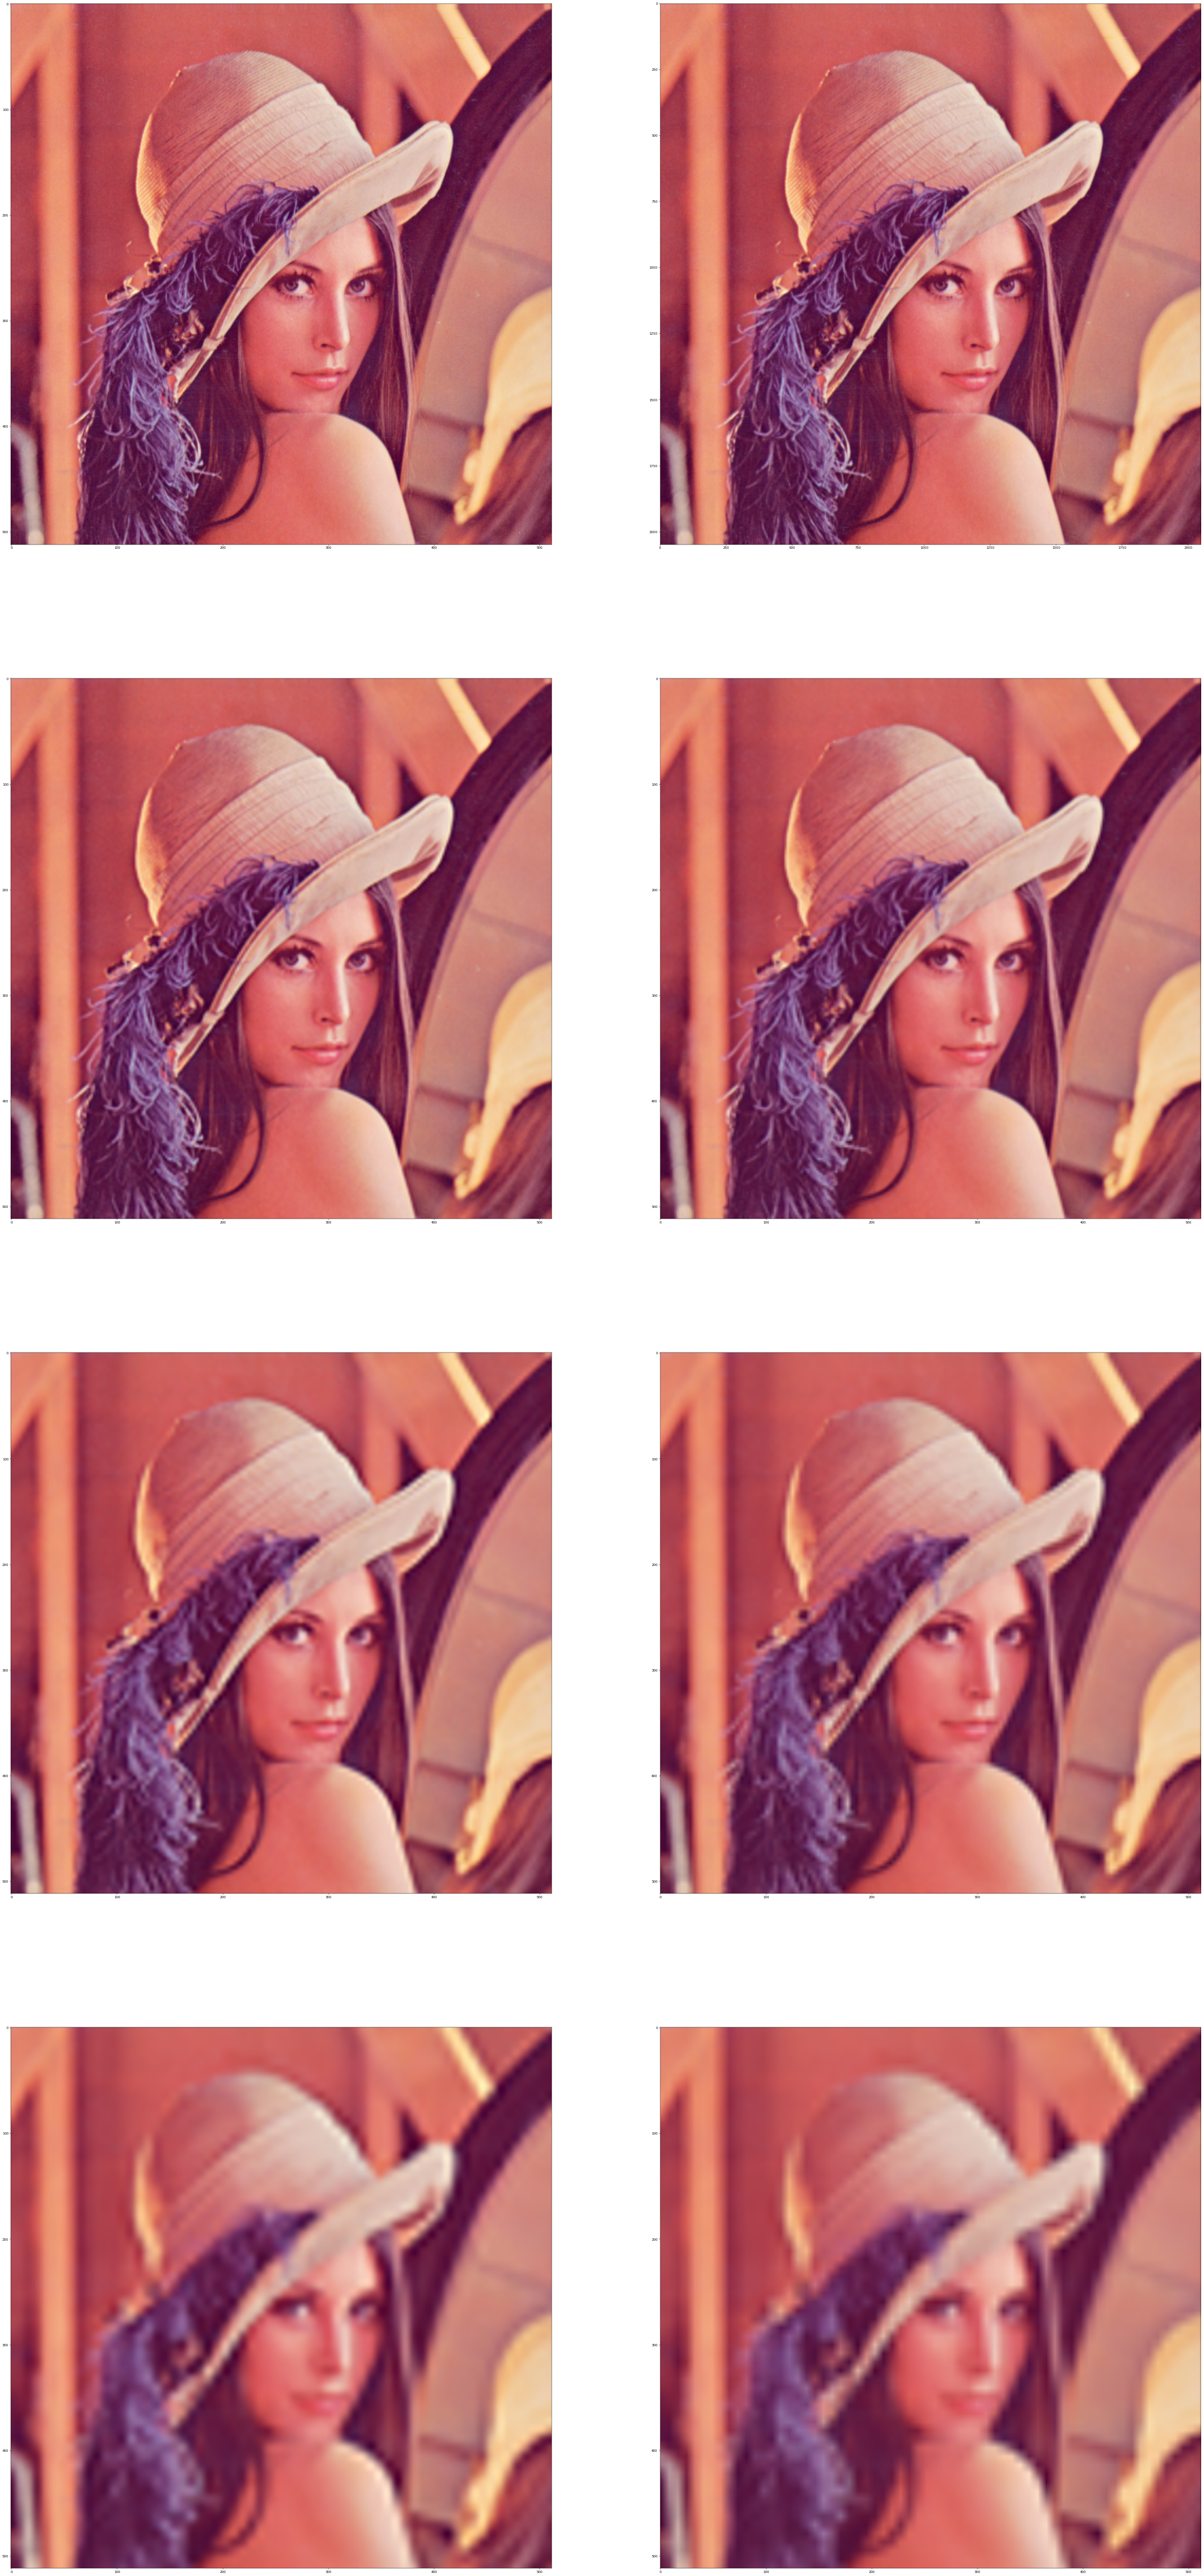

In [40]:
#NRNB


imgOrgsc = BinLin(imgOrg, 4)
img2sc = BinLin(img2, 2)
img4sc = BinLin(img4, 4)
img8sc = BinLin(img8, 8)

img2scB = BinCub(img2, 2)
img4scB = BinCub(img4, 4)
img8scB = BinCub(img8, 8)


fig, ax = subplots(4, 2, figsize=(64,140), dpi=40, sharex=False)
#tight_layout()

ax[0, 0].imshow(imgOrg)
ax[0, 1].imshow(imgOrgsc)
ax[1, 0].imshow(img2scB)
ax[1, 1].imshow(img2sc)
ax[2, 0].imshow(img4scB)
ax[2, 1].imshow(img4sc)
ax[3, 0].imshow(img8scB)
ax[3, 1].imshow(img8sc)

#ax[0, 0].set_title('Original - 512x512', fontsize = 60)
#ax[0, 1].set_title('Original * 4 - 2048x2048', fontsize = 60)
#ax[1, 0].set_title('Original / 2 - 256x256', fontsize = 60)
#ax[1, 1].set_title('Upscaled 2 times to Original - 512x512', fontsize = 60)
#ax[2, 0].set_title('Original / 4 - 128x128', fontsize = 60)
#ax[2, 1].set_title('Upscaled 4 times to Original - 512x512', fontsize = 60)
#ax[3, 0].set_title('Original / 8 - 64x64', fontsize = 60)
#ax[3, 1].set_title('Upscaled 8 times to Original - 512x512', fontsize = 60)


    

In [46]:
imgGrayOrg = io.imread('myData/grayScale.png')
imgRedOrg = io.imread('myData/redScale.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


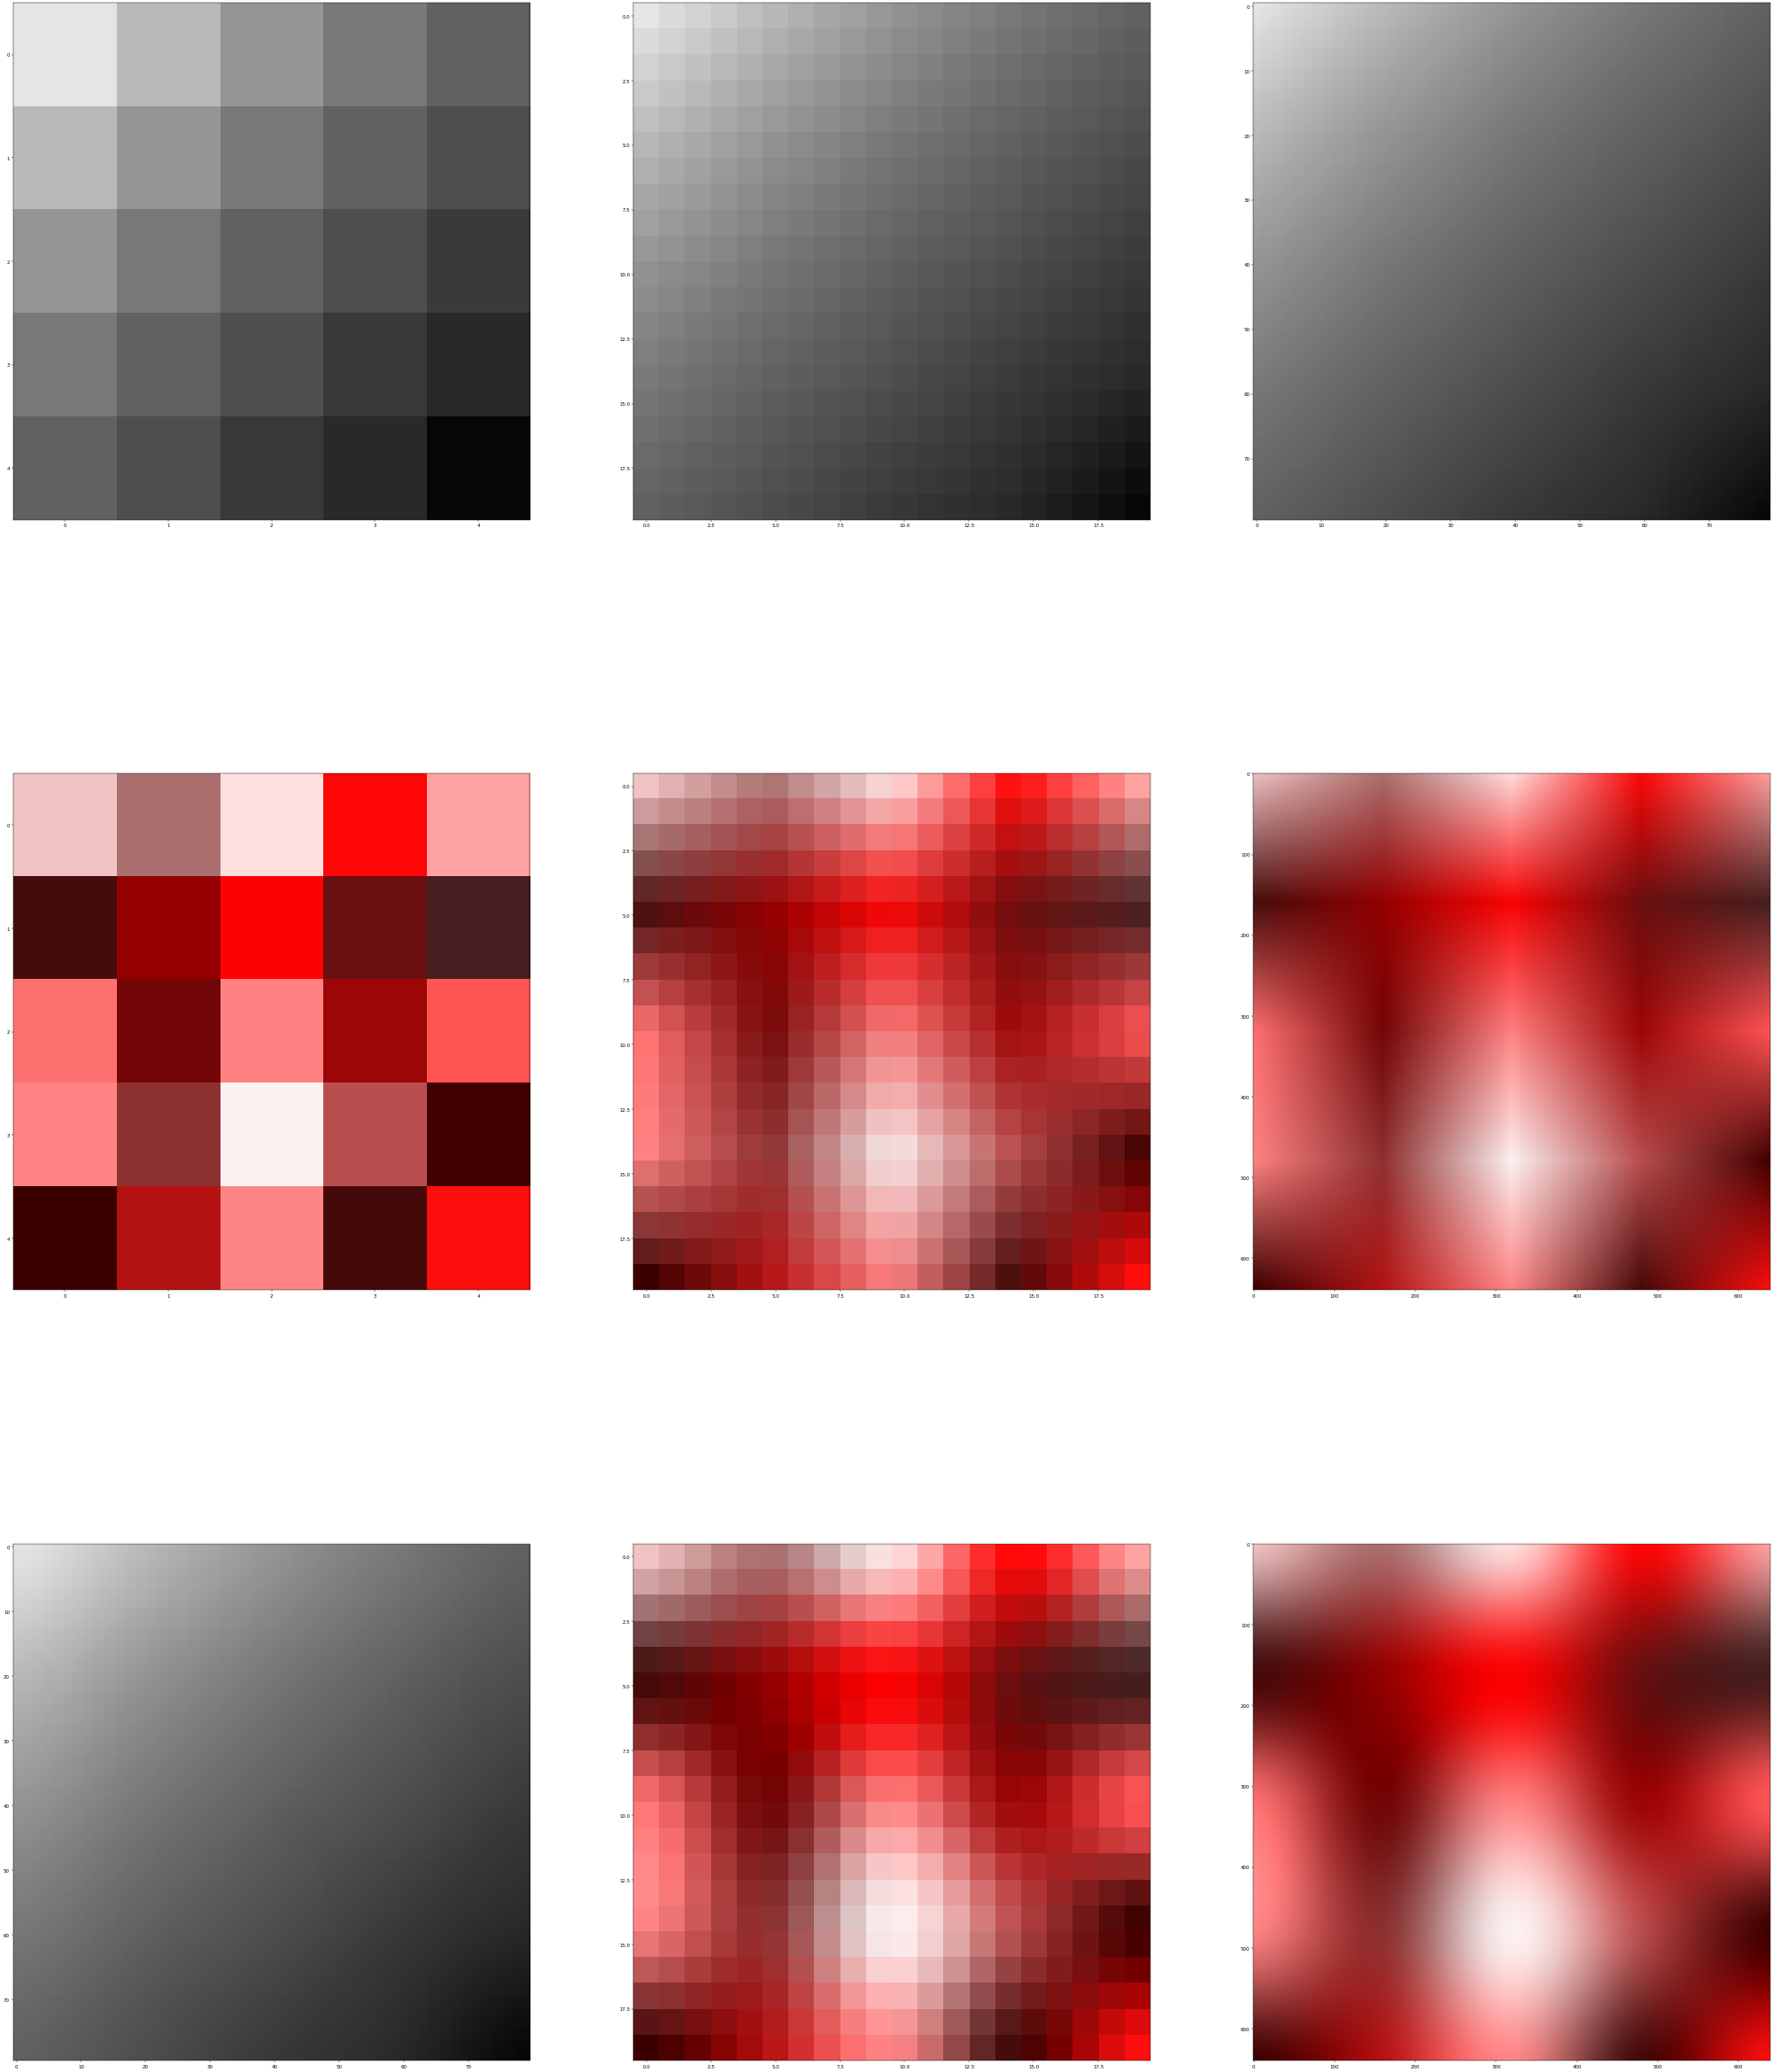

In [25]:
imgGraySc4 = BinLin(imgGrayOrg, 4)
imgGraySc16 = BinLin(imgGrayOrg, 16)
imgRedSc4 = BinLin(imgRedOrg, 4)
imgRedSc16 = BinLin(imgRedOrg, 128)

imgRedScCb4 = BinCub(imgRedOrg, 4)
imgRedScCb16 = BinCub(imgRedOrg, 128)
imgGrayScCb16 = BinCub(imgGrayOrg, 16)

fig, ax = subplots(3, 3, figsize=(64,80), dpi=40, sharex=False)

ax[0, 0].imshow(imgGrayOrg)
ax[0, 1].imshow(imgGraySc4)
ax[0, 2].imshow(imgGraySc16)
ax[1, 0].imshow(imgRedOrg)
ax[1, 1].imshow(imgRedSc4)
ax[1, 2].imshow(imgRedSc16)
ax[2, 0].imshow(imgGrayScCb16)
ax[2, 1].imshow(imgRedScCb4)
ax[2, 2].imshow(imgRedScCb16)
